In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [33]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
len(train_images)

60000

In [5]:
train_images.shape

(60000, 28, 28)

In [41]:
train_images[0][0][0]

0

In [35]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [36]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [37]:
train_labels.shape

(60000,)

In [38]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


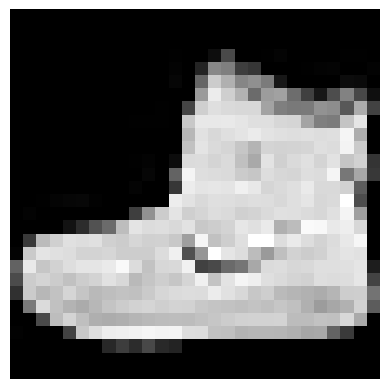

In [42]:
# Alternatively, you can use matplotlib to display the image
plt.imshow(cv2.cvtColor(train_images[0], cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()

In [43]:
train_labels[0]

9

In [44]:
class_names[train_labels[0]]

'Ankle boot'

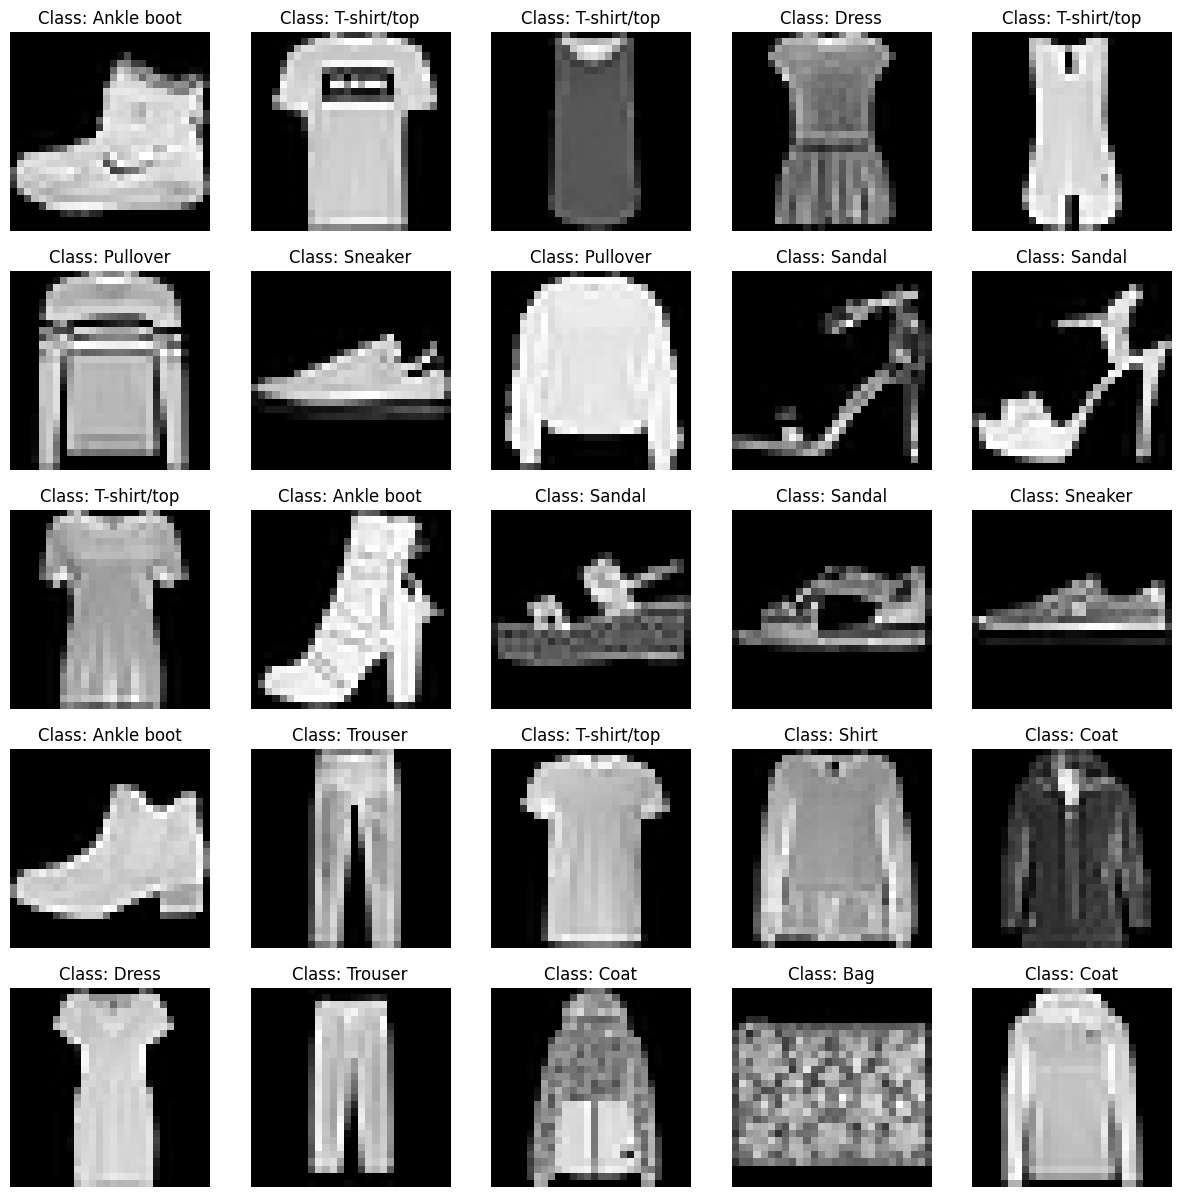

In [46]:
# Display the first 25 images
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    # plt.title(f"Label: {train_labels[i]}")
    plt.title(f"Class: {class_names[train_labels[i]]}")
    plt.axis('off')

plt.show()

In [48]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [49]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [50]:
train_images[0].shape

(28, 28)

In [18]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### sparse_categorical_crossentropy
![Cat](https://miro.medium.com/v2/resize:fit:774/0*vteMfTAGWsIZSaOW)

# Loss functions
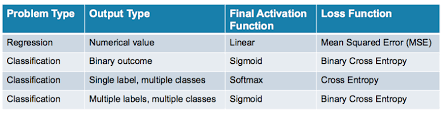

# Model Training

In [20]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 43s 56ms/step - loss: 0.5799 - accuracy: 0.7878 - val_loss: 0.4382 - val_accuracy: 0.8440
Epoch 2/5
750/750 [==============================] - 39s 52ms/step - loss: 0.3652 - accuracy: 0.8674 - val_loss: 0.3423 - val_accuracy: 0.8767
Epoch 3/5
750/750 [==============================] - 41s 55ms/step - loss: 0.3092 - accuracy: 0.8877 - val_loss: 0.3158 - val_accuracy: 0.8866
Epoch 4/5
750/750 [==============================] - 41s 54ms/step - loss: 0.2787 - accuracy: 0.8983 - val_loss: 0.2966 - val_accuracy: 0.8907
Epoch 5/5
750/750 [==============================] - 40s 54ms/step - loss: 0.2524 - accuracy: 0.9087 - val_loss: 0.2722 - val_accuracy: 0.9044


### explanation:
epochs=5: This parameter specifies the number of times the entire training dataset is processed by the model during training. In this case, the model will go through the entire training dataset five times.

#### batch_size=64:
This parameter specifies the number of training examples utilized in one iteration (or one batch) during the training process. The model updates its weights after processing each batch. In this case, the batch size is set to 64, meaning that the model processes 64 training examples at a time before updating the weights.

So, the "number of training examples" is the total count of data samples in your training dataset, and the "batch size" is the number of examples processed in each iteration during training. The total number of iterations per epoch is determined by the formula:

#### Total Iterations or batches=Number of Training Examples/Batch Size


In [51]:
len(train_images)/64
# but here baches are 750

937.5

In [52]:
len(train_images)*80/100

48000.0

In [53]:
48000.0/64

750.0

In [31]:
750*5

3750

# training and testing split
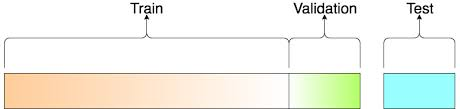

# Backpropagation
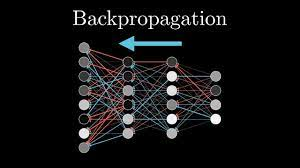

# Gradient descent
![Cat](https://machinelearningspace.com/wp-content/uploads/2023/01/Gradient-Descent-Top2-1024x645.png)
### farmula
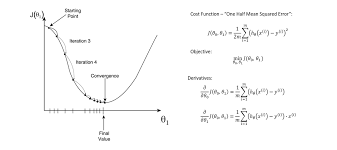


# Model Evaluation

In [54]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.2869 - accuracy: 0.8974
Test accuracy: 0.8974000215530396


# checking prediction on first image

In [55]:
y_predicted = model.predict(test_images)
y_predicted[0]

313/313 [==============================] - 2s 8ms/step


array([6.7826352e-07, 2.2449535e-06, 2.4978493e-07, 3.3224040e-08,
       1.8048188e-06, 1.5896144e-03, 1.9181081e-07, 6.7330978e-04,
       1.3312787e-06, 9.9773055e-01], dtype=float32)

In [56]:
np.argmax(y_predicted[0])

9

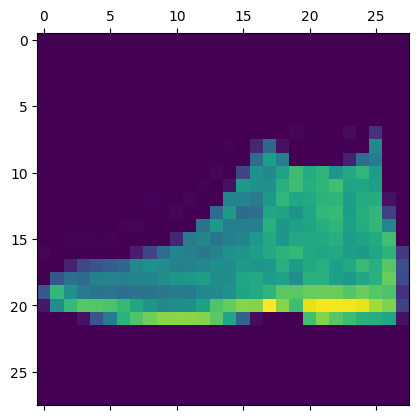

In [57]:
plt.matshow(test_images[0])

In [25]:
test_labels[0]

9

In [58]:
class_names[test_labels[0]]

'Ankle boot'